In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 수화 이미지 분류 경진대회 EDA
- 수화 이미지 숫자 1, 2, 3, 4, 5, 6, 7, 8, 9, 10-1, 10-2 중 이미지들을 올바른 라벨로 분류하는 대회

# 데이터 로드


In [3]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지 숨김
from glob import glob 
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from '/usr/local/lib/python3.7/dist-packages/PIL/Image.py'>

In [4]:
import pandas as pd
label_df = pd.read_csv('/content/gdrive/MyDrive/데이콘_수화 이미지 분류/train.csv')
label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


In [6]:
label_df.shape

(858, 2)

In [14]:
def load_CIFAR10(path):
    
    path = path
    images = []
    for filename in glob(path +"*"):
        #print(filename)
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [15]:
training_images = load_CIFAR10(path = '/content/gdrive/MyDrive/데이콘_수화 이미지 분류/train/')

# 간단한 EDA
- 이미지 데이터 적절한 탐색

## 이미지 크기 확인
- 먼저 이미지 데이터의 크기(shape)를 확인

In [16]:
print("train 이미지 크기:",training_images.shape)
print("train 라벨 크기:",label_df.shape)

train 이미지 크기: (858, 224, 224, 3)
train 라벨 크기: (858, 2)


shape의 출력값에서 (858, 224, 224, 3)는 (count, high pixel, width pixel, channels)를 의미한다.

1. count
- train 데이터에서 총 858개의 이미지가 존재한다고 볼 수 있다.
2. Pixel
- 이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것이다. 
- 각 픽셀은 단색의 직사각형인데, 전체 이미지의 크기를 표현할 때는 (세로픽셀수 x 가로픽셀수) 형식으로 표현한다.
- 따라서 현재 이미지에서는 224개 픽셀 x 224개 픽셀로 구성되어 있다.
3. channels
- 마지막 숫자 3 값은 RGB 값을 나타낸다.
- 픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)라고 하는데, 대표적인 색공간으로는 RGB(Red- Green- Blue), 그레이스케일(gray scale), HSV(Hue-Saturation-Value)방식이 있다.

## RGB 이미지 출력
- RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다.
- 8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다.
- 예시로 0번 이미지를 출력할겸 R, G, B channel의 이미지를 보자

In [18]:
img_rgb = training_images[0]
print(img_rgb.shape)
img_rgb

(224, 224, 3)


array([[[176, 149,  96],
        [184, 157, 104],
        [181, 155, 104],
        ...,
        [133, 112,  69],
        [136, 114,  73],
        [138, 116,  75]],

       [[186, 159, 106],
        [184, 157, 104],
        [181, 155, 102],
        ...,
        [135, 113,  72],
        [135, 113,  72],
        [137, 115,  74]],

       [[178, 151,  98],
        [178, 151,  98],
        [178, 153,  99],
        ...,
        [ 95,  81,  52],
        [ 90,  77,  48],
        [ 91,  78,  49]],

       ...,

       [[ 20,  32,  32],
        [ 72,  90,  94],
        [126, 149, 155],
        ...,
        [ 20,  13,   3],
        [ 22,  15,   5],
        [ 22,  15,   5]],

       [[ 65,  79,  80],
        [ 95, 115, 124],
        [117, 138, 145],
        ...,
        [ 23,  16,   6],
        [ 23,  16,   6],
        [ 20,  13,   3]],

       [[106, 124, 134],
        [ 87, 106, 113],
        [ 69,  79,  80],
        ...,
        [ 24,  15,   6],
        [ 24,  17,   7],
        [ 21,  14,   4]]

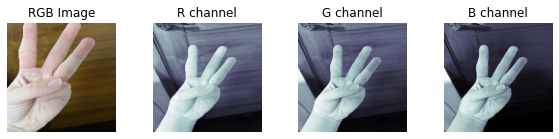

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB Image")

plt.subplot(142)
plt.imshow(img_rgb[:,:,0], cmap = plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(img_rgb[:,:,1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(img_rgb[:,:,2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

## 라벨 이미지 출력
- random 함수를 사용해 랜덤하게 10개 이미지를 출력


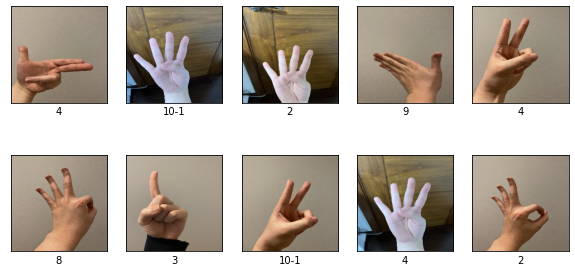

In [21]:
plt.figure(figsize=[10, 5])
for i in range(10):
  import random
  num = random.randint(0, 858)
  plt.subplot(2, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(label_df.label[num])
  plt.imshow(training_images[num])
plt.show()

## 라벨 분포 확인
- 실제로 라벨이 어떻게 되어 있는지 확인하기 위해 라벨의 unique 값을 확인.

In [22]:
print(np.unique(label_df.label))

['1' '10-1' '10-2' '2' '3' '4' '5' '6' '7' '8' '9']


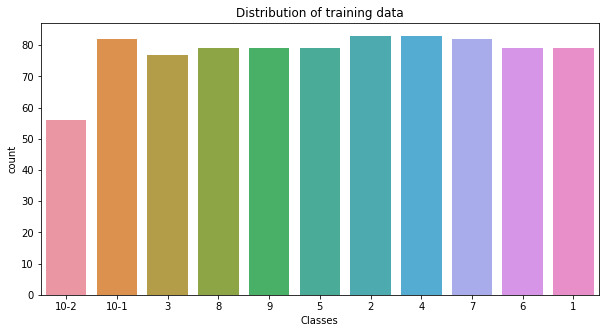

In [23]:
plt.figure(figsize=[10,5])
sns.countplot(label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

- 10-2를 제외하곤 모든 클래스가 거의 균일하게 분포.
- 실제로 학습 하기 앞서 라벨을 모두 정수형으로 바꿔주어야 하므로 문자열을 숫자로 처리하는 작업 진행

- 이후 딥러닝 모델을 사용하기 위해서 pytorch에서는 예측해야할 라벨을 0부터 읽어드리므로 0부터 10까지 범위로 치환.
- 따라서 라벨 '10-1'는 10으로, 라벨 '10-2'는 0으로 바꿔준다.

In [24]:
label_df['label'][label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
label_df['label'][label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
label_df['label'] = label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int


In [27]:
print(np.unique(label_df.label))

[ 0  1  2  3  4  5  6  7  8  9 10]


- 정상적으로 0부터 10까지 정수형으로 치환.
- 모델링 이후 다시 문자열로 역변환을 해야 한다!